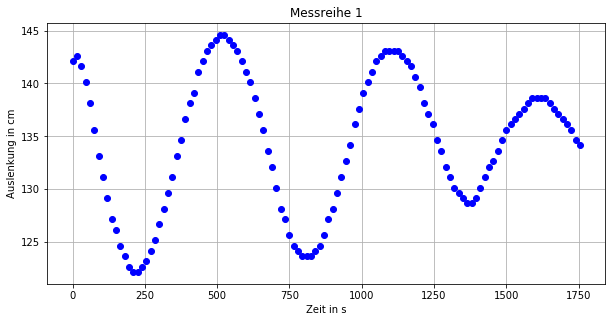

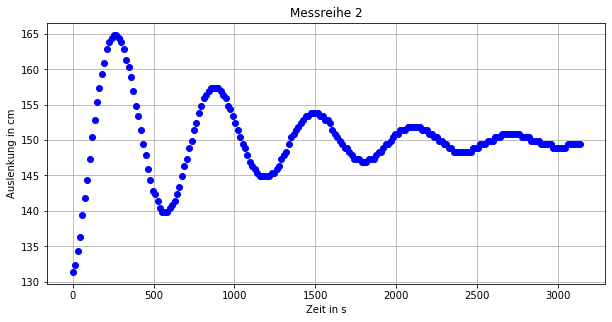

7.875 10.625
[8.375 8.375 7.5   7.375 7.75 ]
[11.125 10.5   10.875 10.5   10.5   10.375 10.5  ]
[585.0, 510.0] [592.5, 562.5]
[615.0, 615.0, 615.0, 600.0] [615.0, 615.0, 605.0, 602.5]
562.5 610.3125


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
#Messwerte
y1=np.loadtxt("Messreihe1.txt",usecols=0)
y2=np.loadtxt("Messreihe2.txt",usecols=1)
t1=np.arange(0,1760,15)
t2=np.loadtxt("Messreihe2.txt",usecols=0)
#Maximalausschläge
y1ex=np.array([130,152.5,131.5,151,136.5,146.5,139.5])
y2ex=np.array([175.5,150.5,168,155.5,164.5,157.5,162.5,159,161.5,159.5])
#zu erwartende Endeinstellungen
y1i_=[(y1ex[i]+y1ex[i+2]+2*y1ex[i+1])/4 for i in range (5)]
y2i_=[(y2ex[i]+y2ex[i+2]+2*y2ex[i+1])/4 for i in range (7)]
y0=150

y1_=(np.mean(y1i_)-150)*-1
y2_=np.mean(y2i_)-150

##systematischer Fehler von 0.5cm
sigma=0.5





from matplotlib.pyplot import figure


plt.figure(figsize=[10,4.8])
plt.grid()
plt.plot(t1,y1-y1_, 'bo')
plt.title("Messreihe 1")
plt.xlabel("Zeit in s")
plt.ylabel("Auslenkung in cm")
plt.savefig('Messwerte1.png')
plt.show()


plt.figure(figsize=[10,4.8])
plt.grid()
plt.plot(t2,y2-y2_, 'bo')
plt.title("Messreihe 2")
plt.xlabel("Zeit in s")
plt.ylabel("Auslenkung in cm")
plt.savefig('Messwerte2.png')
plt.show()


##normierte Auslenkungen

y1ii=(np.array([141.625, 141.625, 142.5, 142.625, 142.25])-150)*-1
y2ii=np.array([161.125, 160.5, 160.875, 160.5, 160.5, 160.375, 160.5])-150


###Maxima und minima

max1=np.array([517.5,1102.5,1612.5])
min1=np.array([217.5,810,1372.5])

max2=np.array([262.5,877.5,1492.5,2107.5,2707.5])
min2=np.array([570,1185,1800,2405,3007.5])

##Berechnung der Perioden

T1max=[max1[i+1]-max1[i] for i in range (2)]
T1min=[min1[i+1]-min1[i] for i in range (2)]

T2max=[max2[i+1]-max2[i] for i in range (4)]
T2min=[min2[i+1]-min2[i] for i in range (4)]

##Zusammenführung der Perioden in ein Array

T1ges=np.array([585.0, 510.0, 592.5, 562.5])
T2ges=np.array([615.0, 615.0, 615.0, 600.0,615.0, 615.0, 605.0, 602.5])

T1_=np.mean(T1ges)
T2_=np.mean(T2ges)

print(y1_,y2_)
print(y1ii)
print(y2ii)
print(T1max,T1min)
print(T2max,T2min)
print(T1_,T2_)

[-1.45266018e+01 -6.34109030e-04  8.48620699e-01  9.07794848e-01
  2.80963200e-01]


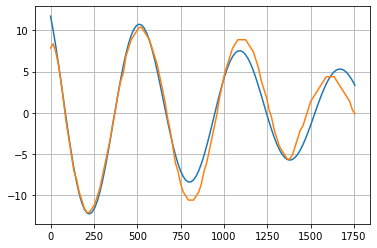

In [26]:
from scipy import optimize
import scipy.optimize
p1=y1-y1_

##fit für erste Messreihe
def test_func(x, a, b,c,d,e):
    return a * (np.exp(b*x))*(np.sin(c*x-d))+e

params, params_covariance = optimize.curve_fit(test_func, t1, p1,
                                               p0=[1,0,1,1,1])
print(params)

plt.plot(t1,test_func(t1,params[0],params[1],params[2],params[3],params[4]))
plt.plot(t1,p1)
plt.grid()


[ 1.98085295e+01 -1.09952186e-03  8.47993744e-01  1.23706829e+00
 -3.88461288e-02]
19.80852946348442 -0.0010995218563319754 0.8479937440823686 1.2370682874322207 -0.038846128847781936


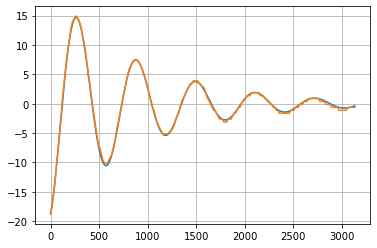

In [36]:
from scipy import optimize
import scipy.optimize
p2=y2-y2_

##fit für zweite Messreihe
def test_func(x, a, b,c,d,e):
    return a * (np.exp(b*x))*(np.sin(c*x-d))+e

params, params_covariance = optimize.curve_fit(test_func, t2, p2,
                                               p0=[1,0,1,1,1])
print(params)

plt.plot(t2,test_func(t2,params[0],params[1],params[2],params[3],params[4]))
plt.plot(t2,y2-y2_)
plt.grid()
print(params[0],params[1],params[2],params[3],params[4])